<a href="https://colab.research.google.com/github/vikaschaudhary53/Book-Recommendation-System/blob/main/Book_Recommendation_System_Unsupervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
from datetime import datetime

import warnings
from pylab import rcParams
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
books_df = pd.read_csv('/content/drive/MyDrive/Almabetter/Module/Machine Learning/Capstone Project - Unsupervised Learning - Vikas Chaudhary/data_book_recommendation/Books.csv')
ratings_df = pd.read_csv('/content/drive/MyDrive/Almabetter/Module/Machine Learning/Capstone Project - Unsupervised Learning - Vikas Chaudhary/data_book_recommendation/Ratings.csv')
users_df = pd.read_csv('/content/drive/MyDrive/Almabetter/Module/Machine Learning/Capstone Project - Unsupervised Learning - Vikas Chaudhary/data_book_recommendation/Users.csv')

In [ ]:
books_df

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [ ]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [ ]:
books_df.shape

(271360, 8)

####Get the required columns in 'book_df'

In [ ]:
books_df.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [ ]:
#select the columns that we need
books_df = books_df[['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher']]

In [ ]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [ ]:
#Rename columns
books_df.rename(columns={'Book-Title':'title', 'Book-Author':'author','Year-Of-Publication':'year','Publisher':'publisher'}, inplace=True)

In [ ]:
books_df.head()

,ISBN,title,author,year,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


###Know about the users

In [ ]:
users_df

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [ ]:
users_df.shape

(278858, 3)

In [ ]:
#renaming all the columns to small case
users_df.rename(columns={'User-ID':'user_id','Location':'location','Age':'age'}, inplace=True)

In [ ]:
users_df.head()

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


###Know about ratings dataframe

In [ ]:
ratings_df

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [ ]:
ratings_df.shape

(1149780, 3)

In [ ]:
#Rename the columns
ratings_df.rename(columns={'User-ID':'user_id','Book-Rating':'rating'}, inplace=True)

In [ ]:
ratings_df.head()

,user_id,ISBN,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


####Filtering on the basis of:
1. Book at least has the ratings by 50 readers.
2. Reader at least has rated 200 books.

In [ ]:
ratings_df['user_id'].value_counts()

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
116180        1
116166        1
116154        1
116137        1
276723        1
Name: user_id, Length: 105283, dtype: int64

In [ ]:
ratings_df['user_id'].value_counts().shape

(105283,)

In [ ]:
#keeping users with at least rating more than 200
ratings_df['user_id'].value_counts()>200

11676      True
198711     True
153662     True
98391      True
35859      True
          ...  
116180    False
116166    False
116154    False
116137    False
276723    False
Name: user_id, Length: 105283, dtype: bool

In [ ]:
x=ratings_df['user_id'].value_counts()>200

In [ ]:
x[x].shape

(899,)

In [ ]:
y=x[x].index

In [ ]:
y

Int64Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352,
            110973, 235105,
            ...
            260183,  73681,  44296, 155916,   9856, 274808,  28634,  59727,
            268622, 188951],
           dtype='int64', length=899)

In [ ]:
ratings_df=ratings_df[ratings_df['user_id'].isin(y)]

In [ ]:
ratings_df

,user_id,ISBN,rating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0
...,...,...,...
1147612,275970,3829021860,0
1147613,275970,4770019572,0
1147614,275970,896086097,0
1147615,275970,9626340762,8


###Joining 'ratings_df' with 'books_df'

In [ ]:
books_rating = ratings_df.merge(books_df, on='ISBN')

In [ ]:
books_rating

,user_id,ISBN,rating,title,author,year,publisher
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
...,...,...,...,...,...,...,...
487666,275970,1892145022,0,Here Is New York,E. B. White,1999,Little Bookroom
487667,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002,Capital Books (VA)
487668,275970,3411086211,10,Die Biene.,Sybil GrÃ?Â¤fin SchÃ?Â¶nfeldt,1993,"Bibliographisches Institut, Mannheim"
487669,275970,3829021860,0,The Penis Book,Joseph Cohen,1999,Konemann


In [ ]:
number_rating=books_rating.groupby('title')['rating'].count().reset_index()

In [ ]:
number_rating

,title,rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1
...,...,...
160264,Ã?Â?ber die Pflicht zum Ungehorsam gegen den S...,3
160265,Ã?Â?lpiraten.,1
160266,Ã?Â?rger mit Produkt X. Roman.,1
160267,Ã?Â?stlich der Berge.,1


In [ ]:
number_rating.rename(columns={'rating':'number_of_ratings'}, inplace=True)

In [ ]:
number_rating

,title,number_of_ratings
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1
...,...,...
160264,Ã?Â?ber die Pflicht zum Ungehorsam gegen den S...,3
160265,Ã?Â?lpiraten.,1
160266,Ã?Â?rger mit Produkt X. Roman.,1
160267,Ã?Â?stlich der Berge.,1


In [ ]:
#joining the rating with title
final_rating = books_rating.merge(number_rating, on='title')

In [ ]:
final_rating

,user_id,ISBN,rating,title,author,year,publisher,number_of_ratings
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
...,...,...,...,...,...,...,...,...
487666,275970,1892145022,0,Here Is New York,E. B. White,1999,Little Bookroom,1
487667,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002,Capital Books (VA),1
487668,275970,3411086211,10,Die Biene.,Sybil GrÃ?Â¤fin SchÃ?Â¶nfeldt,1993,"Bibliographisches Institut, Mannheim",1
487669,275970,3829021860,0,The Penis Book,Joseph Cohen,1999,Konemann,1


In [ ]:
final_rating = final_rating[final_rating['number_of_ratings']>50]

In [ ]:
final_rating

,user_id,ISBN,rating,title,author,year,publisher,number_of_ratings
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
...,...,...,...,...,...,...,...,...
228881,127233,0061090956,0,Still Waters,Kerry Tucker,1992,Harper Mass Market Paperbacks (Mm),83
228882,262399,0061090956,0,Still Waters,Kerry Tucker,1992,Harper Mass Market Paperbacks (Mm),83
228883,178667,074350996X,0,Still Waters,Jennifer Lauck,2001,Simon &amp; Schuster Audio,83
228884,185233,074350996X,0,Still Waters,Jennifer Lauck,2001,Simon &amp; Schuster Audio,83


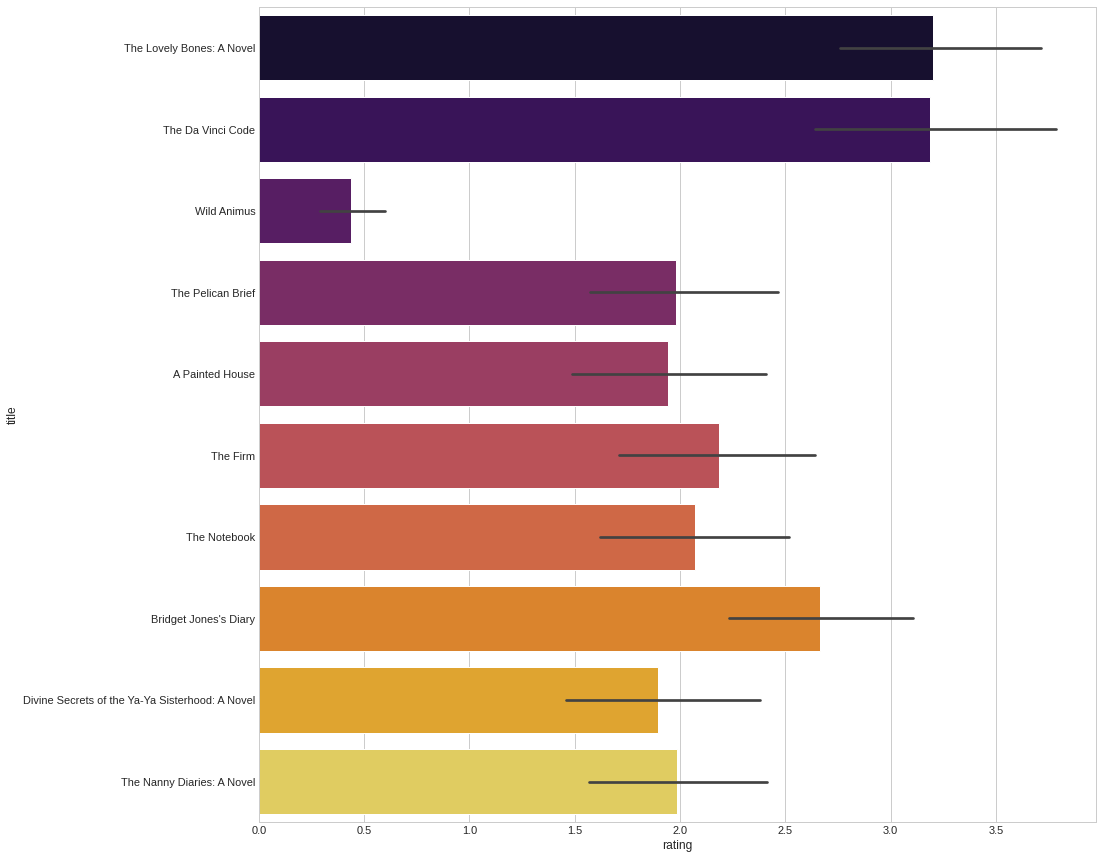

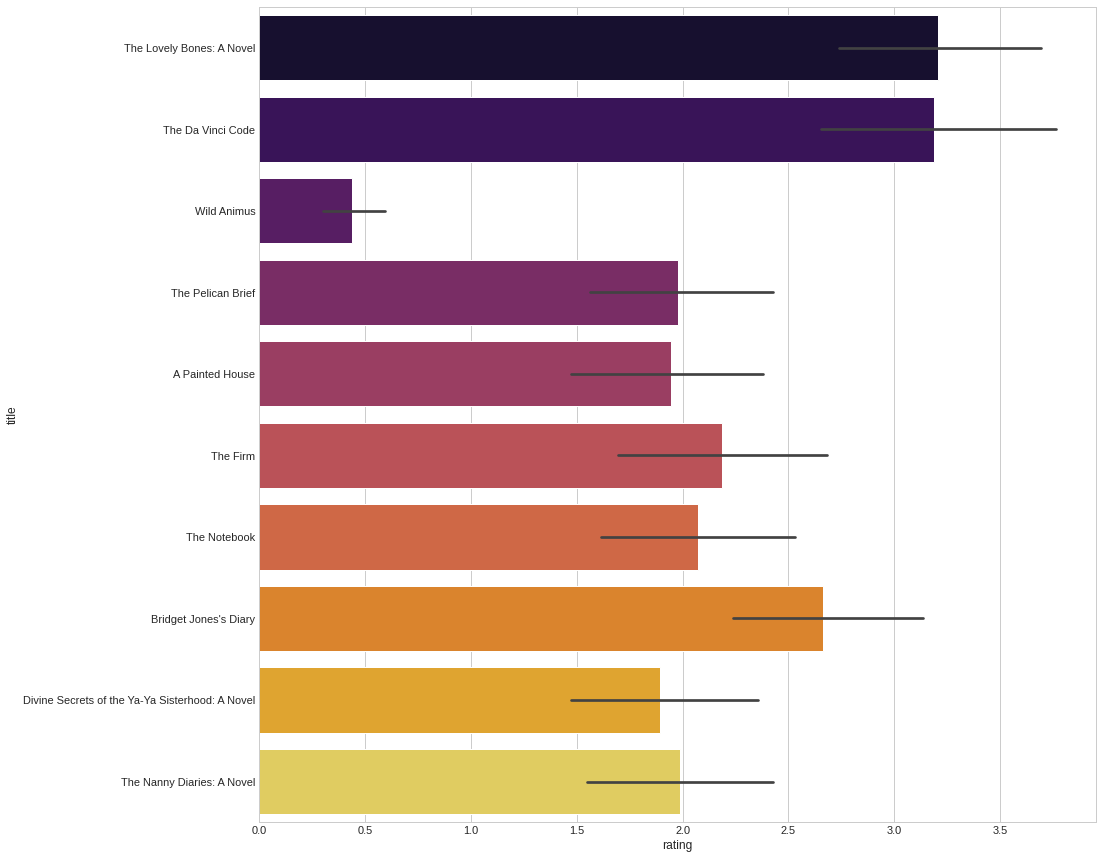

In [ ]:
top_ten=final_rating[final_rating['number_of_ratings']>220]

plt.style.use('seaborn-whitegrid')
top_ten=final_rating[final_rating['number_of_ratings']>220]

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=[15,15])
sns.barplot(x='rating', y='title', data=top_ten,palette='inferno')
plt.figure(figsize=[15,15])
sns.barplot(x='rating', y='title', data=top_ten,palette='inferno')

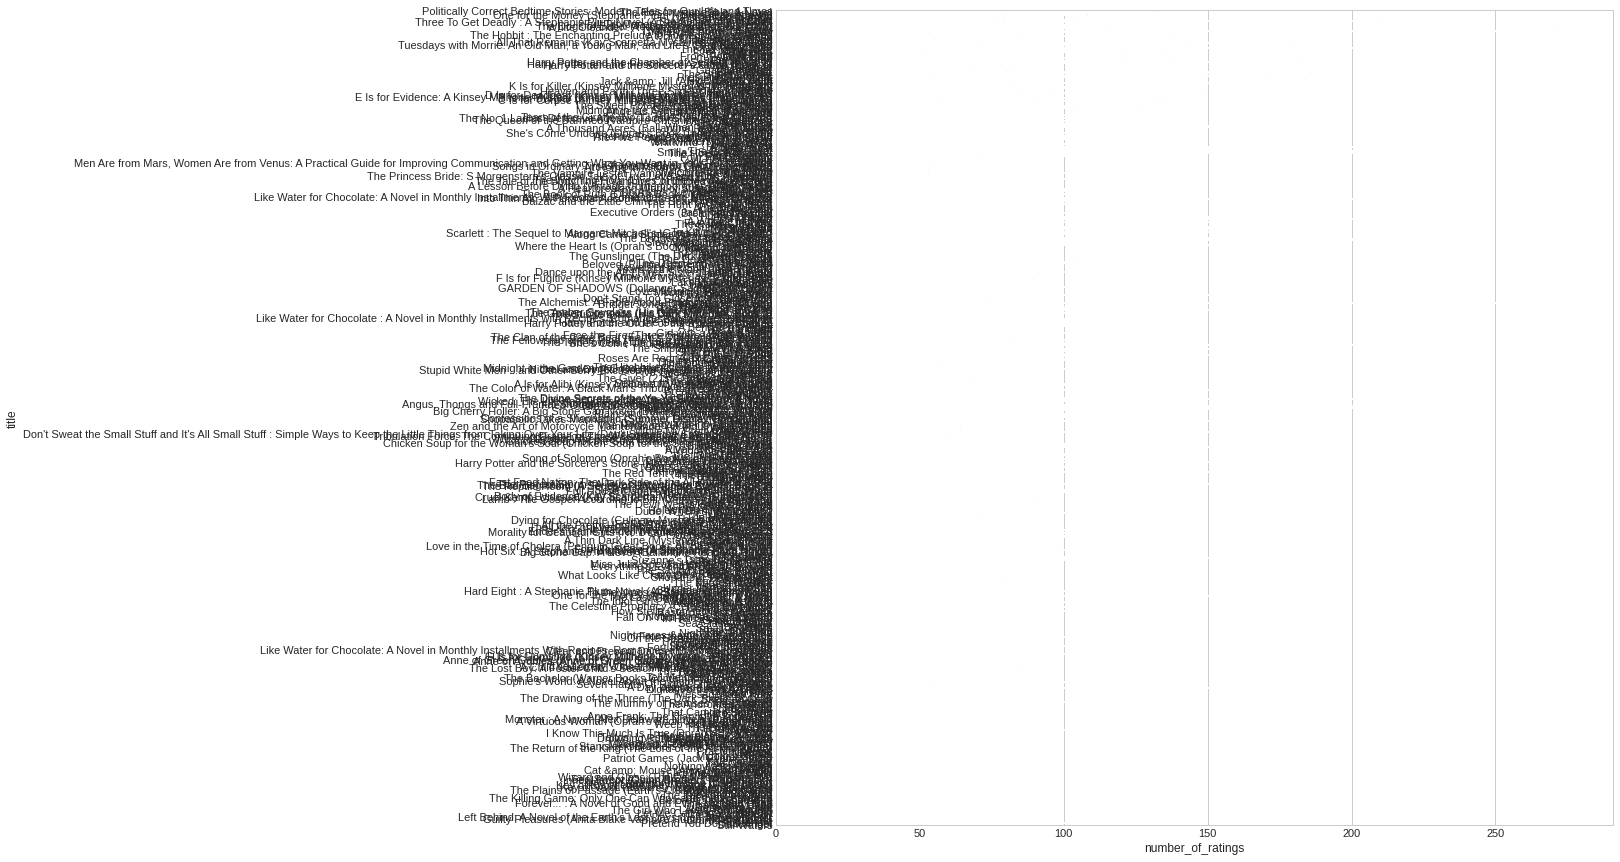

In [ ]:
top_rated=final_rating[final_rating['rating']==10]

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=[15,15])
sns.barplot(x='number_of_ratings', y='title', data=top_rated,palette='inferno')

In [ ]:
top_rated=final_rating[final_rating['rating']==10]

In [ ]:
top_rated

,user_id,ISBN,rating,title,author,year,publisher,number_of_ratings
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
16,52584,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
50,183995,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
303,112001,0060930535,10,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,133
...,...,...,...,...,...,...,...,...
223475,254465,0671525433,10,Dark Angel,V.C. Andrews,1986,Pocket,54
223481,112001,0553506307,10,Dark Angel,Sally Beauman,1997,"Acacia Press, Inc.",54
228862,251843,0553292722,10,Still Waters,TAMI HOAG,1992,Bantam,83
228873,76151,0743439651,10,Still Waters,Jennifer Lauck,2001,Atria,83


In [ ]:
len(top_rated['rating'].unique())
#top_rated=final_rating[final_rating['rating']==10]

1

In [ ]:
len(top_rated['title'].unique())

654

In [ ]:
top_rated.groupby('title')['number_of_ratings'].count().reset_index()

,title,number_of_ratings
0,1984,11
1,1st to Die: A Novel,10
2,2nd Chance,7
3,84 Charing Cross Road,11
4,A Bend in the Road,3
...,...,...
649,Year of Wonders,5
650,You Belong To Me,2
651,Zen and the Art of Motorcycle Maintenance: An ...,2
652,Zoya,1


In [ ]:
top_rated['number_of_ratings'].value_counts(ascending=True)

114      1
133      2
122      2
200      2
163      3
      ... 
78      76
81      97
183    104
53     106
62     107
Name: number_of_ratings, Length: 128, dtype: int64

In [ ]:
top_rated[top_rated['number_of_ratings']>200]

,user_id,ISBN,rating,title,author,year,publisher,number_of_ratings
1100,16795,0142001740,10,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books,209
1108,29259,0142001740,10,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books,209
1114,36606,0142001740,10,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books,209
1124,55548,0142001740,10,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books,209
1163,124363,0142001740,10,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books,209
...,...,...,...,...,...,...,...,...
70145,273979,0312278586,10,The Nanny Diaries: A Novel,Emma McLaughlin,2002,St. Martin's Press,230
70161,36606,0312291639,10,The Nanny Diaries: A Novel,Emma McLaughlin,2003,St. Martin's Griffin,230
70179,107301,0312291639,10,The Nanny Diaries: A Novel,Emma McLaughlin,2003,St. Martin's Griffin,230
70198,160819,0312291639,10,The Nanny Diaries: A Novel,Emma McLaughlin,2003,St. Martin's Griffin,230


In [ ]:
final_rating.drop_duplicates(['user_id','title'], inplace=True)

In [ ]:
final_rating.shape

(57952, 8)

###Pivot Table

In [ ]:
book_pivot = final_rating.pivot_table(columns='user_id', index='title', values='rating')

In [ ]:
book_pivot

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84 Charing Cross Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [ ]:
book_pivot.fillna(0, inplace=True)

In [ ]:
book_pivot

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from scipy.sparse import csr_matrix
book_sparse = csr_matrix(book_pivot)

In [ ]:
type(book_sparse)

scipy.sparse.csr.csr_matrix

In [ ]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(algorithm='brute')

In [ ]:
model.fit(book_sparse)

NearestNeighbors(algorithm='brute')

In [ ]:
np.where(book_pivot.index==237)

(array([], dtype=int64),)

In [ ]:
distances, suggestions = model.kneighbors(book_pivot.iloc[356,:].values.reshape(1,-1), n_neighbors=6)

In [ ]:
distances

array([[ 0.        , 17.32050808, 17.34935157, 17.66352173, 19.        ,
        19.18332609]])

In [ ]:
suggestions

array([[356, 305,   8, 173, 377,  92]])

In [ ]:
for i in range(len(suggestions)):
  print(book_pivot.index[suggestions[i]])

Index(['No Safe Place', 'Long After Midnight', 'A Civil Action', 'Exclusive',
       'Pleading Guilty', 'CAT'S EYE'],
      dtype='object', name='title')


In [ ]:
np.where(book_pivot.index=='Animal Farm')[0][0]

47

In [ ]:
def book_recommendation(book_name):
  book_id = np.where(book_pivot.index==book_name)[0][0]
  distances, suggestions = model.kneighbors(book_pivot.iloc[book_id,:].values.reshape(1,-1), n_neighbors=6)

  for i in range(len(suggestions)):
    # if i!=0:
      # print(book_pivot.index[suggestions[i]])
      print(i)

In [ ]:
book_recommendation('Animal Farm')

0


In [ ]:
def book_recommendation(book_name):
  book_id = np.where(book_pivot.index==book_name)[0][0]
  distances, suggestions = model.kneighbors(book_pivot.iloc[book_id,:].values.reshape(1,-1), n_neighbors=6)

  for i in range(len(suggestions)):
    if i==0:
      print("The suggestions for", book_name, "are: ")
    if not i:
      print(book_pivot.index[suggestions[i]])

In [ ]:
book_recommendation('Animal Farm')

The suggestions for Animal Farm are: 
Index(['Animal Farm', 'Exclusive', 'Jacob Have I Loved', 'Pleading Guilty',
       'No Safe Place', 'Foucault's Pendulum'],
      dtype='object', name='title')


In [ ]:
book_recommendation('Harry Potter and the Chamber of Secrets (Book 2)')

The suggestions for Harry Potter and the Chamber of Secrets (Book 2) are: 
Index(['Harry Potter and the Chamber of Secrets (Book 2)',
       'Harry Potter and the Prisoner of Azkaban (Book 3)',
       'Harry Potter and the Goblet of Fire (Book 4)',
       'Harry Potter and the Sorcerer's Stone (Book 1)', 'Exclusive',
       'The Cradle Will Fall'],
      dtype='object', name='title')
